In [1]:
from pycaret.classification import * 

In [2]:
import matplotlib.pyplot as plt

In [3]:
import os, csv
import pandas as pd

In [5]:
%matplotlib inline

In [6]:
DV_IV_TRAIN=pd.read_csv('DV_IV_TRAIN.csv')
DV_IV_TEST=pd.read_csv('DV_IV_TEST.csv')
DV_IV_TRANSFORMED=pd.read_csv('DV_IV_TRANSFORMED.csv')

In [7]:
DV_IV_TRAIN.head
DV_IV_TEST.head
DV_IV_TRANSFORMED.head

<bound method NDFrame.head of            date    yy  mm RECESSION       CPI  FEDFUNDS       GDP    INDPRO  \
0    1959-01-01  1959   1         n -0.000345     -0.05  0.011242  0.019395   
1    1959-02-01  1959   2         n -0.000345     -0.05  0.011242  0.019395   
2    1959-03-01  1959   3         n -0.000345     -0.05  0.011242  0.019395   
3    1959-04-01  1959   4         n -0.000345      0.37  0.011242  0.014302   
4    1959-05-01  1959   5         n -0.000345      0.16  0.011242  0.021079   
..          ...   ...  ..       ...       ...       ...       ...       ...   
739  2020-08-01  2020   8         y -0.000524      0.01  0.008757  0.041132   
740  2020-09-01  2020   9         y  0.005638      0.01  0.029611  0.007335   
741  2020-10-01  2020  10         y  0.005850     -0.01  0.033755 -0.000604   
742  2020-11-01  2020  11         y  0.003696      0.00  0.023984  0.009787   
743  2020-12-01  2020  12         y  0.002031      0.00  0.005865  0.004645   

       PAYEMS       P

In [8]:
DV_IV_TRAIN.shape
DV_IV_TEST.shape
DV_IV_TRANSFORMED.shape

(744, 13)

In [9]:
DV_IV_TRAIN.columns
#type(DV_IV_TRAIN)

Index(['date', 'yy', 'mm', 'RECESSION', 'CPI', 'FEDFUNDS', 'GDP', 'INDPRO',
       'PAYEMS', 'PIX', 'SP500', 'UNEMPLOY', 'YC'],
      dtype='object')

In [10]:
DV_IV_TRANSFORMED['RECESSION'].value_counts()
DV_IV_TRAIN['RECESSION'].value_counts()
DV_IV_TEST['RECESSION'].value_counts()

n    18
y    18
Name: RECESSION, dtype: int64

In [11]:
df_tr=DV_IV_TRAIN.drop(['date', 'yy', 'mm'], axis=1)
df_tr.head

<bound method NDFrame.head of     RECESSION       CPI  FEDFUNDS       GDP    INDPRO    PAYEMS       PIX  \
0           n -0.000345     -0.05  0.011242  0.019395  0.003994  0.003576   
1           n -0.000345     -0.05  0.011242  0.019395  0.003994  0.003576   
2           n -0.000345     -0.05  0.011242  0.019395  0.003994  0.003576   
3           n -0.000345      0.37  0.011242  0.014302  0.006168  0.007374   
4           n -0.000345      0.16  0.011242  0.021079  0.005774  0.007019   
..        ...       ...       ...       ...       ...       ...       ...   
571         n  0.002985      0.25 -0.000216 -0.000367  0.001429 -0.001851   
572         n  0.002481      0.01  0.000346  0.003924  0.001274 -0.000853   
573         n  0.005436      0.00  0.001415 -0.002030  0.001089  0.007297   
574         n  0.004426      0.00  0.002718 -0.000572  0.000066  0.007181   
575         n -0.004919      0.00  0.003190 -0.000961  0.001541  0.005170   

        SP500  UNEMPLOY    YC  
0   -0.000722

In [12]:
df_te=DV_IV_TEST.drop(['date', 'yy', 'mm'], axis=1)
df_te.head

<bound method NDFrame.head of    RECESSION       CPI  FEDFUNDS       GDP    INDPRO    PAYEMS       PIX  \
0          n -0.004448     -0.01  0.002575  0.010346  0.001356  0.004095   
1          n  0.000495      0.01  0.001219 -0.005215  0.001660 -0.000287   
2          n  0.005431      0.01  0.000471  0.010029  0.000589  0.004535   
3          n  0.001658      0.00  0.000662  0.002178  0.001707  0.004594   
4          n  0.003871     -0.01  0.001539  0.007005  0.000356  0.001456   
5          n  0.005187      0.00  0.002094  0.000486  0.001095 -0.000382   
6          n  0.002996      0.00  0.002080  0.000282  0.000551 -0.001341   
7          n  0.004124      0.01  0.001682 -0.000373 -0.000225  0.000116   
8          n  0.002314     -0.24  0.001631  0.002226 -0.000167 -0.000764   
9          n  0.001779     -0.08  0.002105  0.003863  0.000579  0.001679   
10         n  0.000308     -0.18  0.002792 -0.004231  0.000572 -0.002248   
11         n  0.004229     -0.27  0.002459  0.005872  0.00

In [13]:
#change folding and default metric
model_steup = setup(data = df_tr, target = 'RECESSION', 
                    fix_imbalance=True, fold_shuffle=False, 
                    data_split_shuffle = False, 
                    fold_strategy='timeseries', 
                    log_experiment=True, session_id=12345)


,Description,Value
0,session_id,12345
1,Target,RECESSION
2,Target Type,Binary
3,Label Encoded,"n: 0, y: 1"
4,Original Data,"(576, 10)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
#best_model = compare_models()
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8750,0.5524,0.4682,0.4034,0.4068,0.3469,0.3646,0.0740
lda,Linear Discriminant Analysis,0.8500,0.5491,0.4892,0.3526,0.4002,0.3167,0.3347,0.0080
catboost,CatBoost Classifier,0.8694,0.5448,0.4705,0.3875,0.4050,0.3310,0.3493,2.2430
nb,Naive Bayes,0.8556,0.5404,0.4892,0.4052,0.4152,0.3356,0.3618,0.0090
rf,Random Forest Classifier,0.8694,0.5386,0.4322,0.3859,0.3883,nan,0.3307,0.0970
lightgbm,Light Gradient Boosting Machine,0.8667,0.5317,0.4455,0.3948,0.3998,0.3276,0.3418,0.0470
xgboost,Extreme Gradient Boosting,0.8611,0.5304,0.4566,0.3828,0.4019,0.3251,0.3379,0.0860
gbc,Gradient Boosting Classifier,0.8528,0.5265,0.4155,0.3664,0.3748,nan,0.3051,0.0450
ada,Ada Boost Classifier,0.8194,0.5097,0.3538,0.2726,0.2980,0.2160,0.2261,0.0370
lr,Logistic Regression,0.8222,0.4715,0.4322,0.3239,0.3616,0.2634,0.2748,0.4440


In [15]:
#get_logs()

In [16]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']

In [17]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=12345, verbose=0,
                     warm_start=False)


In [18]:
top3 = compare_models(n_select=3,sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8556,0.5404,0.4892,0.4052,0.4152,0.3356,0.3618,0.0080
lda,Linear Discriminant Analysis,0.8500,0.5491,0.4892,0.3526,0.4002,0.3167,0.3347,0.0080
catboost,CatBoost Classifier,0.8694,0.5448,0.4705,0.3875,0.4050,0.3310,0.3493,2.3410
et,Extra Trees Classifier,0.8750,0.5524,0.4682,0.4034,0.4068,0.3469,0.3646,0.0790
xgboost,Extreme Gradient Boosting,0.8611,0.5304,0.4566,0.3828,0.4019,0.3251,0.3379,0.0580
svm,SVM - Linear Kernel,0.7722,0.0000,0.4525,0.3218,0.3658,0.2637,0.2806,0.0100
lightgbm,Light Gradient Boosting Machine,0.8667,0.5317,0.4455,0.3948,0.3998,0.3276,0.3418,0.0460
ridge,Ridge Classifier,0.8139,0.0000,0.4441,0.3250,0.3683,0.2669,0.2784,0.0070
lr,Logistic Regression,0.8222,0.4715,0.4322,0.3239,0.3616,0.2634,0.2748,0.0090
rf,Random Forest Classifier,0.8694,0.5386,0.4322,0.3859,0.3883,nan,0.3307,0.1000


In [19]:
top3

[GaussianNB(priors=None, var_smoothing=1e-09),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                            solver='svd', store_covariance=False, tol=0.0001),

In [20]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8611,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9444,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7222,0.8855,0.1818,0.6667,0.2857,0.1781,0.2364
3,0.8611,0.8996,0.6250,0.7143,0.6667,0.5794,0.5815
4,0.9167,0.9643,1.0000,0.7273,0.8421,0.7874,0.8058
5,0.8056,0.9444,1.0000,0.4615,0.6316,0.5227,0.5948
6,0.8056,0.8344,0.8750,0.7368,0.8000,0.6135,0.6221
7,0.9722,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9444,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9167,0.9955,1.0000,0.7273,0.8421,0.7874,0.8058


In [21]:
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=12345, verbose=0,
                     warm_start=False)


In [22]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9444,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8056,0.8691,0.5455,0.7500,0.6316,0.5039,0.5157
3,0.9167,0.8929,0.7500,0.8571,0.8000,0.7477,0.7503
4,0.8889,0.9688,1.0000,0.6667,0.8000,0.7273,0.7559
5,0.7778,0.9389,1.0000,0.4286,0.6000,0.4783,0.5606
6,0.8333,0.8562,0.9375,0.7500,0.8333,0.6707,0.6875
7,0.9722,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9444,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.8333,0.9911,1.0000,0.5714,0.7273,0.6197,0.6701


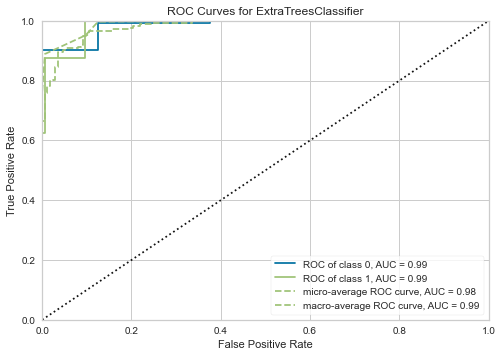

In [23]:
plot_model(tuned_et, plot = 'auc')

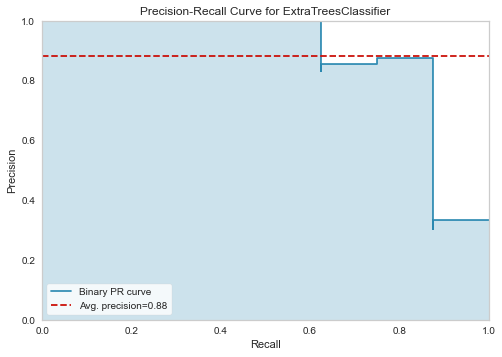

In [24]:
plot_model(tuned_et, plot = 'pr')

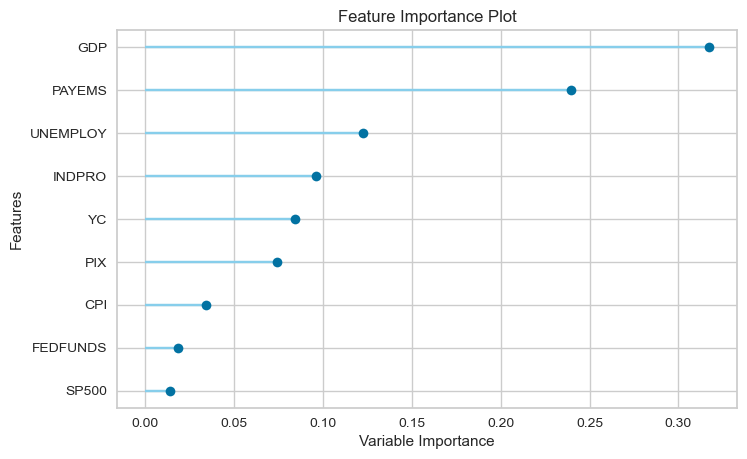

In [25]:
plot_model(tuned_et, plot='feature')

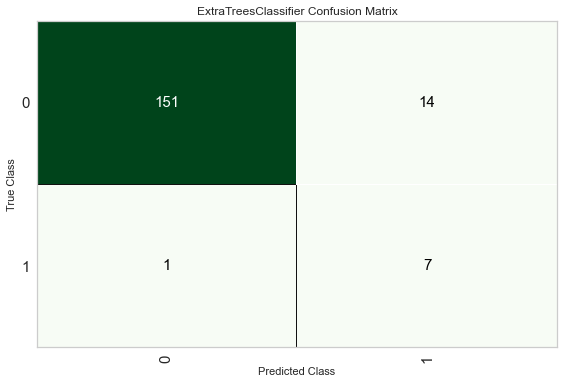

In [26]:
plot_model(tuned_et, plot = 'confusion_matrix')

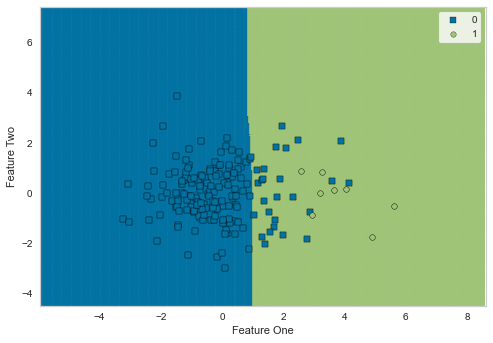

In [27]:
plot_model(tuned_et, plot = 'boundary')

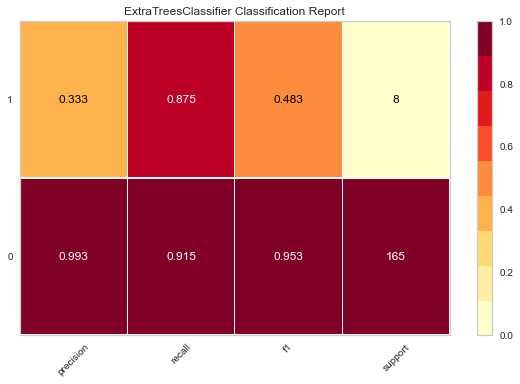

In [28]:
plot_model(tuned_et, plot = 'class_report')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

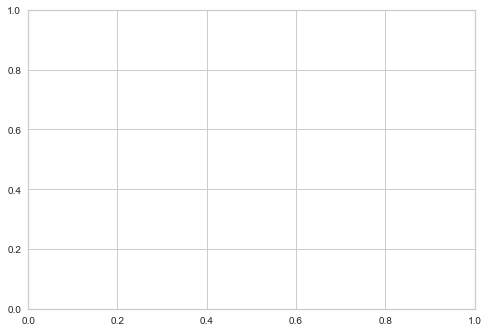

In [29]:
eval_et = evaluate_model(tuned_et)

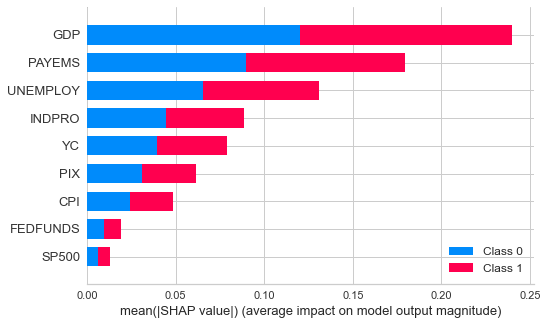

In [30]:
interpret_model(tuned_et)

In [36]:
interpret_model(tuned_et, plot = 'reason', observation=35)

In [31]:
interpret_model(tuned_et, plot = 'reason')

In [32]:
predict_model(tuned_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9133,0.9864,0.8750,0.3333,0.4828,0.4456,0.5081


,CPI,FEDFUNDS,GDP,INDPRO,PAYEMS,PIX,SP500,UNEMPLOY,YC,RECESSION,Label,Score
0,0.002150,-0.51,0.003095,0.008997,0.000717,-0.001349,0.038618,-0.190,3.32,n,n,0.8834
1,0.002859,0.05,0.003188,-0.004933,0.001213,0.003813,-0.024290,-0.063,3.15,n,n,0.8656
2,0.002851,-0.08,0.003552,0.002321,0.000312,-0.004962,0.009064,-0.006,3.70,n,n,0.8282
3,0.002133,-0.12,0.003992,0.007473,0.001651,-0.005797,0.002104,-0.383,3.86,n,n,0.9111
4,0.002128,-0.01,0.003748,0.004245,0.001218,0.004473,0.029813,0.167,3.78,n,n,0.8969
...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.002985,0.25,-0.000216,-0.000367,0.001429,-0.001851,0.005073,0.174,-0.51,n,y,0.6526
169,0.002481,0.01,0.000346,0.003924,0.001274,-0.000853,0.021051,-0.084,-0.61,n,n,0.6781
170,0.005436,0.00,0.001415,-0.002030,0.001089,0.007297,0.024269,-0.244,-0.64,n,n,0.6759
171,0.004426,0.00,0.002718,-0.000572,0.000066,0.007181,0.031022,-0.120,-0.79,n,n,0.7460


In [37]:
final_et = finalize_model(tuned_et)

In [38]:
print(final_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='entropy', max_depth=10, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.01, min_impurity_split=None,
                     min_samples_leaf=6, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=230, n_jobs=-1,
                     oob_score=False, random_state=12345, verbose=0,
                     warm_start=False)


In [39]:
predict_model(final_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9595,0.9955,1.0000,0.5333,0.6957,0.6761,0.7146


,CPI,FEDFUNDS,GDP,INDPRO,PAYEMS,PIX,SP500,UNEMPLOY,YC,RECESSION,Label,Score
0,0.002150,-0.51,0.003095,0.008997,0.000717,-0.001349,0.038618,-0.190,3.32,n,n,0.8993
1,0.002859,0.05,0.003188,-0.004933,0.001213,0.003813,-0.024290,-0.063,3.15,n,n,0.8949
2,0.002851,-0.08,0.003552,0.002321,0.000312,-0.004962,0.009064,-0.006,3.70,n,n,0.8765
3,0.002133,-0.12,0.003992,0.007473,0.001651,-0.005797,0.002104,-0.383,3.86,n,n,0.9511
4,0.002128,-0.01,0.003748,0.004245,0.001218,0.004473,0.029813,0.167,3.78,n,n,0.9383
...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.002985,0.25,-0.000216,-0.000367,0.001429,-0.001851,0.005073,0.174,-0.51,n,y,0.5503
169,0.002481,0.01,0.000346,0.003924,0.001274,-0.000853,0.021051,-0.084,-0.61,n,n,0.7571
170,0.005436,0.00,0.001415,-0.002030,0.001089,0.007297,0.024269,-0.244,-0.64,n,n,0.7771
171,0.004426,0.00,0.002718,-0.000572,0.000066,0.007181,0.031022,-0.120,-0.79,n,n,0.8167


In [40]:
from pycaret.utils import check_metric
#Accuracy, AUC, Recall, Precision, F1, Kappa, MCC

In [41]:
tr_pred = predict_model(final_et, data=df_tr)
tr_pred.head()

,RECESSION,CPI,FEDFUNDS,GDP,INDPRO,PAYEMS,PIX,SP500,UNEMPLOY,YC,Label,Score
0,n,-0.000345,-0.05,0.011242,0.019395,0.003994,0.003576,-0.000722,-0.103,1.62,n,0.9707
1,n,-0.000345,-0.05,0.011242,0.019395,0.003994,0.003576,-0.000722,-0.103,1.67,n,0.9708
2,n,-0.000345,-0.05,0.011242,0.019395,0.003994,0.003576,-0.000722,-0.103,1.30,n,0.9702
3,n,-0.000345,0.37,0.011242,0.014302,0.006168,0.007374,0.000541,-0.164,1.14,n,0.9676
4,n,-0.000345,0.16,0.011242,0.021079,0.005774,0.007019,0.038048,-0.230,1.20,n,0.9681


In [42]:
te_pred = predict_model(final_et, data=df_te)
te_pred.head()

,RECESSION,CPI,FEDFUNDS,GDP,INDPRO,PAYEMS,PIX,SP500,UNEMPLOY,YC,Label,Score
0,n,-0.004448,-0.01,0.002575,0.010346,0.001356,0.004095,0.012537,-0.110,-0.42,n,0.9224
1,n,0.000495,0.01,0.001219,-0.005215,0.001660,-0.000287,0.013961,0.354,-0.70,n,0.5300
2,n,0.005431,0.01,0.000471,0.010029,0.000589,0.004535,-0.022088,-0.189,-0.61,n,0.7224
3,n,0.001658,0.00,0.000662,0.002178,0.001707,0.004594,0.009931,-0.196,-0.62,n,0.8025
4,n,0.003871,-0.01,0.001539,0.007005,0.000356,0.001456,0.042380,0.119,-0.35,n,0.6507


In [43]:
[check_metric(tr_pred['RECESSION'], tr_pred['Label'], metric = 'Accuracy'),
check_metric(tr_pred['RECESSION'], tr_pred['Label'], metric = 'AUC'),
check_metric(tr_pred['RECESSION'], tr_pred['Label'], metric = 'Recall'),
check_metric(tr_pred['RECESSION'], tr_pred['Label'], metric = 'Precision')]

[0.9323, 0.9441, 0.96, 0.6667]

In [44]:
[check_metric(te_pred['RECESSION'], te_pred['Label'], metric = 'Accuracy'),
check_metric(te_pred['RECESSION'], te_pred['Label'], metric = 'AUC'),
check_metric(te_pred['RECESSION'], te_pred['Label'], metric = 'Recall'),
check_metric(te_pred['RECESSION'], te_pred['Label'], metric = 'Precision')]

[0.9444, 0.9444, 1.0, 0.9]

In [45]:
type(te_pred)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='date'>

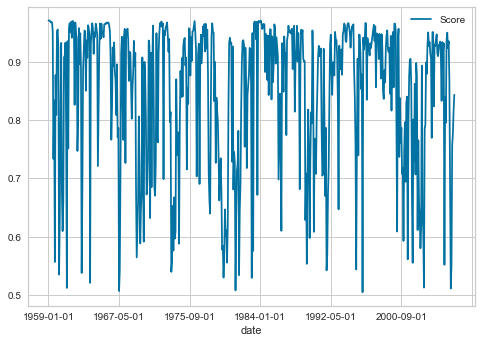

In [46]:
tr_pred["date"] = DV_IV_TRAIN['date']
tr_pred["Pr"] = 1- tr_pred["Score"]
tr_pred.plot(x='date',y='Score')

<AxesSubplot:xlabel='date'>

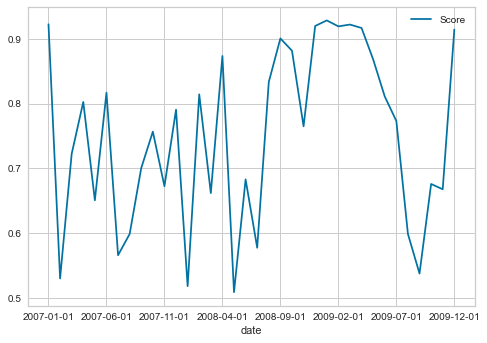

In [47]:
te_pred["date"] = DV_IV_TEST['date']
te_pred["Pr"] = 1- te_pred["Score"]
te_pred.plot(x='date',y='Score')

In [48]:
full_pred=pd.concat([tr_pred,te_pred],ignore_index=True)

In [49]:
full_pred

,RECESSION,CPI,FEDFUNDS,GDP,INDPRO,PAYEMS,PIX,SP500,UNEMPLOY,YC,Label,Score,date,Pr
0,n,-0.000345,-0.05,0.011242,0.019395,0.003994,0.003576,-0.000722,-0.103,1.62,n,0.9707,1959-01-01,0.0293
1,n,-0.000345,-0.05,0.011242,0.019395,0.003994,0.003576,-0.000722,-0.103,1.67,n,0.9708,1959-02-01,0.0292
2,n,-0.000345,-0.05,0.011242,0.019395,0.003994,0.003576,-0.000722,-0.103,1.30,n,0.9702,1959-03-01,0.0298
3,n,-0.000345,0.37,0.011242,0.014302,0.006168,0.007374,0.000541,-0.164,1.14,n,0.9676,1959-04-01,0.0324
4,n,-0.000345,0.16,0.011242,0.021079,0.005774,0.007019,0.038048,-0.230,1.20,n,0.9681,1959-05-01,0.0319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,n,0.001470,-0.05,0.000370,0.010943,-0.002599,-0.005025,0.071522,-0.106,3.24,n,0.5987,2009-08-01,0.4013
608,n,0.008265,0.00,0.001043,0.011146,-0.001401,-0.003086,0.033009,0.213,3.16,n,0.5376,2009-09-01,0.4624
609,n,-0.000298,-0.01,0.002222,0.007538,-0.001849,-0.001849,0.035100,0.195,3.29,n,0.6759,2009-10-01,0.3241
610,n,0.003343,-0.03,0.003609,0.003196,-0.001529,-0.001497,-0.019960,0.343,3.09,n,0.6677,2009-11-01,0.3323


<AxesSubplot:xlabel='date'>

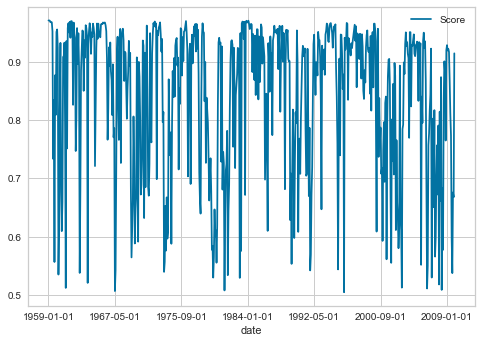

In [50]:
full_pred.plot(x='date',y='Score')